In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
matches = pd.read_csv("matches.csv")
delivery = pd.read_csv("deliveries.csv")
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure

# Overview of dataset - "matches"

In [205]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [206]:
matches.shape

(756, 18)

In [207]:
print("Unique values\n")
print(matches.nunique())
print("\n \n")
print("Null values \n")
print(matches.isnull().sum())

Unique values

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

 

Null values 

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


1. A majority columns do not have information about umpire 3. Let us drop that column.
2. winner and player_of_match has 4 nan values, city has 7 nan.

In [208]:
matches.drop("umpire3", axis =1, inplace = True)

Let us try to look for city information in Venue feature and complete that column.

In [209]:
matches[matches.city.isnull()]['venue']

461    Dubai International Cricket Stadium
462    Dubai International Cricket Stadium
466    Dubai International Cricket Stadium
468    Dubai International Cricket Stadium
469    Dubai International Cricket Stadium
474    Dubai International Cricket Stadium
476    Dubai International Cricket Stadium
Name: venue, dtype: object

In [210]:
matches["city"] = matches["city"].fillna('Dubai')

In [211]:
city_venue = matches.groupby(['city','venue']).count()["result"]
city_venue_df = pd.DataFrame(city_venue)
city_venue_df.drop("result",axis = 1, inplace = True)
city_venue_df

Empty DataFrame
Columns: []
Index: [(Abu Dhabi, Sheikh Zayed Stadium), (Ahmedabad, Sardar Patel Stadium, Motera), (Bangalore, M Chinnaswamy Stadium), (Bengaluru, M Chinnaswamy Stadium), (Bengaluru, M. Chinnaswamy Stadium), (Bloemfontein, OUTsurance Oval), (Cape Town, Newlands), (Centurion, SuperSport Park), (Chandigarh, Punjab Cricket Association IS Bindra Stadium, Mohali), (Chandigarh, Punjab Cricket Association Stadium, Mohali), (Chennai, M. A. Chidambaram Stadium), (Chennai, MA Chidambaram Stadium, Chepauk), (Cuttack, Barabati Stadium), (Delhi, Feroz Shah Kotla), (Delhi, Feroz Shah Kotla Ground), (Dharamsala, Himachal Pradesh Cricket Association Stadium), (Dubai, Dubai International Cricket Stadium), (Durban, Kingsmead), (East London, Buffalo Park), (Hyderabad, Rajiv Gandhi International Stadium, Uppal), (Hyderabad, Rajiv Gandhi Intl. Cricket Stadium), (Indore, Holkar Cricket Stadium), (Jaipur, Sawai Mansingh Stadium), (Johannesburg, New Wanderers Stadium), (Kanpur, Green Park), (Kimberley, De Beers Diamond Oval), (Kochi, Nehru Stadium), (Kolkata, Eden Gardens), (Mohali, IS Bindra Stadium), (Mohali, Punjab Cricket Association IS Bindra Stadium, Mohali), (Mumbai, Brabourne Stadium), (Mumbai, Dr DY Patil Sports Academy), (Mumbai, Wankhede Stadium), (Nagpur, Vidarbha Cricket Association Stadium, Jamtha), (Port Elizabeth, St George's Park), (Pune, Maharashtra Cricket Association Stadium), (Pune, Subrata Roy Sahara Stadium), (Raipur, Shaheed Veer Narayan Singh International Stadium), (Rajkot, Saurashtra Cricket Association Stadium), (Ranchi, JSCA International Stadium Complex), (Sharjah, Sharjah Cricket Stadium), (Visakhapatnam, ACA-VDCA Stadium), (Visakhapatnam, Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium)]

Let us replace the old name by new name to remove duplicates in case of Bengaluru.

Also, venue for Mohali/Chandigarh is same so we do not need to show them in different cities.

In [212]:
matches["city"].replace(to_replace="Bangalore" , value = "Bengaluru", inplace =True)
matches["city"].replace(to_replace="Mohali" , value = "Chandigarh", inplace =True)
matches["venue"].replace(to_replace="Punjab Cricket Association IS Bindra Stadium, Mohali",value ="IS Bindra Stadium", inplace =True )

Let us see does it look any better now ?

In [213]:
city_venue = matches.groupby(['city','venue']).count()["result"]
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

result
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bengaluru      M Chinnaswamy Stadium                                   73
               M. Chinnaswamy Stadium                                   7
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     IS Bindra Stadium                                       21
               Punjab Cricket Association Stadium, Mohali              35
Chennai        M. A. Chidambaram Stadium                                8
               MA Chidambaram Stadium, Chepauk                         49
Cuttack        Barabati Stadium                                         7
Delhi          Feroz Shah Kotla                                        67
               Feroz Shah Kotla Ground                                  7
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Dubai          Dubai International Cricket Stadium                      7
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium, Uppal               56
               Rajiv Gandhi Intl. Cricket Stadium                       8
Indore         Holkar Cricket Stadium                                   9
Jaipur         Sawai Mansingh Stadium                                  47
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               4
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            77
Mumbai         Brabourne Stadium                                       11
               Dr DY Patil Sports Academy                              17
               Wankhede Stadium                                        73
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                 21
               Subrata Roy Sahara Stadium                              17
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                  10
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                  6
Visakhapatnam  ACA-VDCA Stadium                                         2
               Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      11

Let us see which umpires are not listed in the data?

I searched on ESPNcricinfo and updated the values.

In [214]:
matches[(matches.umpire1.isnull()) | (matches.umpire2.isnull())]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [215]:
matches.iloc[4,15]="Sundaram Ravi"
matches.iloc[4,16]="Virender Sharma"
matches.iloc[753,15] = "Bruce Oxenford"
matches.iloc[753,16]="Sundaram Ravi"

In [216]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [217]:
print(matches.isnull().sum())

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            0
umpire2            0
dtype: int64


In [218]:
# The four matches which are having null values are because they were called off and their was no result as such.
matches[matches.winner.isnull()][['result','player_of_match','venue']]

,result,player_of_match,venue
300,no result,NaN,Feroz Shah Kotla
545,no result,NaN,M Chinnaswamy Stadium
570,no result,NaN,M Chinnaswamy Stadium
744,no result,NaN,M. Chinnaswamy Stadium


# Data Analysis

In [219]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Sundaram Ravi,Virender Sharma


**I have always liked the function describe().
We can tell:
We have data starting from 2008 to 2019.
Win by run maximum has been 146 in a 20-20 format !
I will manipulate the dataset to group the data by teams to analyse them against each other.**

Let us make a dictionary and convert it to a pandas dataframe. I explored with time and updated the dataframe.

In [220]:
team = pd.DataFrame({
    'n_play': matches.team1.value_counts() + matches.team2.value_counts(),
    'n_won': matches.winner.value_counts(),
    'n_lost': matches.team1.value_counts() + matches.team2.value_counts() - matches.winner.value_counts(),
    'diff': 2* matches.winner.value_counts() - matches.team1.value_counts() - matches.team2.value_counts(),
    'toss': matches.toss_winner.value_counts(),
    
})
    
team = team.reset_index()
team.rename(columns = {'index':'Teams'}, inplace = True)
team.head(100)

,Teams,n_play,n_won,n_lost,diff,toss
0,Chennai Super Kings,164,100,64,36,89
1,Deccan Chargers,75,29,46,-17,43
2,Delhi Capitals,16,10,6,4,10
3,Delhi Daredevils,161,67,94,-27,80
4,Gujarat Lions,30,13,17,-4,15
5,Kings XI Punjab,176,82,94,-12,81
6,Kochi Tuskers Kerala,14,6,8,-2,8
7,Kolkata Knight Riders,178,92,86,6,92
8,Mumbai Indians,187,109,78,31,98
9,Pune Warriors,46,12,34,-22,20


Finding the number of tosses won by a team in its whole career untill 2019.

In [221]:
table = pd.DataFrame(matches.groupby("toss_decision")["toss_winner"].value_counts())
table = table.reset_index(level = 'toss_decision' )
table.rename(columns = {'toss_winner':'count_of'}, inplace = True)
table.drop("toss_decision", axis = 1, inplace = True)
table = table.reset_index(level = 'toss_winner' )

In [222]:
table.head(10)

,toss_winner,count_of
0,Chennai Super Kings,48
1,Mumbai Indians,44
2,Rajasthan Royals,32
3,Kolkata Knight Riders,30
4,Delhi Daredevils,29
5,Kings XI Punjab,26
6,Deccan Chargers,24
7,Royal Challengers Bangalore,20
8,Sunrisers Hyderabad,20
9,Pune Warriors,11


I pre-checked using a column called toss_decision the indices upto which I should slice accordingly.

In [223]:
table1 = table.iloc[0:14,0:3]
table1.columns=['Teams','bat']
table1

,Teams,bat
0,Chennai Super Kings,48
1,Mumbai Indians,44
2,Rajasthan Royals,32
3,Kolkata Knight Riders,30
4,Delhi Daredevils,29
5,Kings XI Punjab,26
6,Deccan Chargers,24
7,Royal Challengers Bangalore,20
8,Sunrisers Hyderabad,20
9,Pune Warriors,11


In [224]:
team = pd.merge(team,table1, on ="Teams")

In [225]:
team

,Teams,n_play,n_won,n_lost,diff,toss,bat
0,Chennai Super Kings,164,100,64,36,89,48
1,Deccan Chargers,75,29,46,-17,43,24
2,Delhi Capitals,16,10,6,4,10,2
3,Delhi Daredevils,161,67,94,-27,80,29
4,Gujarat Lions,30,13,17,-4,15,1
5,Kings XI Punjab,176,82,94,-12,81,26
6,Kochi Tuskers Kerala,14,6,8,-2,8,3
7,Kolkata Knight Riders,178,92,86,6,92,30
8,Mumbai Indians,187,109,78,31,98,44
9,Pune Warriors,46,12,34,-22,20,11


In [226]:
table2 = table.iloc[15:29,0:3]
table2.columns=['Teams','field']

In [227]:
team = pd.merge(team,table2, on ="Teams")
team

,Teams,n_play,n_won,n_lost,diff,toss,bat,field
0,Chennai Super Kings,164,100,64,36,89,48,41
1,Deccan Chargers,75,29,46,-17,43,24,19
2,Delhi Capitals,16,10,6,4,10,2,8
3,Delhi Daredevils,161,67,94,-27,80,29,51
4,Gujarat Lions,30,13,17,-4,15,1,14
5,Kings XI Punjab,176,82,94,-12,81,26,55
6,Kochi Tuskers Kerala,14,6,8,-2,8,3,5
7,Mumbai Indians,187,109,78,31,98,44,54
8,Pune Warriors,46,12,34,-22,20,11,9
9,Rajasthan Royals,147,75,72,3,80,32,48


Finding out the teams which won the toss as well as the match !

In [228]:
ww=matches[matches['toss_winner']==matches['winner']]
ww = ww.winner.value_counts()
pd.DataFrame(ww)
ww = ww.reset_index()
ww.columns = ["Teams","tw_mw"]
team = pd.merge(ww,team,how='inner',on ="Teams")
team

,Teams,tw_mw,n_play,n_won,n_lost,diff,toss,bat,field
0,Chennai Super Kings,57,164,100,64,36,89,48,41
1,Mumbai Indians,56,187,109,78,31,98,44,54
2,Rajasthan Royals,42,147,75,72,3,80,32,48
3,Royal Challengers Bangalore,41,180,84,96,-12,81,20,61
4,Kings XI Punjab,35,176,82,94,-12,81,26,55
5,Delhi Daredevils,35,161,67,94,-27,80,29,51
6,Sunrisers Hyderabad,23,108,58,50,8,46,20,26
7,Deccan Chargers,19,75,29,46,-17,43,24,19
8,Gujarat Lions,10,30,13,17,-4,15,1,14
9,Delhi Capitals,7,16,10,6,4,10,2,8


Finding out the teams which were not toss winners but still won the match !
That's the spirit, YAY !

In [229]:
lw=matches[matches['toss_winner']!=matches['winner']]
lw = lw.winner.value_counts()
pd.DataFrame(ww)
lw = lw.reset_index()
lw.columns = ["Teams","tl_mw"]
team = pd.merge(lw,team,how='inner',on ="Teams")
team

,Teams,tl_mw,tw_mw,n_play,n_won,n_lost,diff,toss,bat,field
0,Mumbai Indians,53,56,187,109,78,31,98,44,54
1,Kings XI Punjab,47,35,176,82,94,-12,81,26,55
2,Royal Challengers Bangalore,43,41,180,84,96,-12,81,20,61
3,Chennai Super Kings,43,57,164,100,64,36,89,48,41
4,Sunrisers Hyderabad,35,23,108,58,50,8,46,20,26
5,Rajasthan Royals,33,42,147,75,72,3,80,32,48
6,Delhi Daredevils,32,35,161,67,94,-27,80,29,51
7,Deccan Chargers,10,19,75,29,46,-17,43,24,19
8,Pune Warriors,9,3,46,12,34,-22,20,11,9
9,Delhi Capitals,3,7,16,10,6,4,10,2,8


Let me explain quickly what I have done so far:

## Dataset description:
**Teams :** Name of the team.


**n_play :** Number of matches played by the team yet.


**n_won :** Number of matches won by the team yet.


**n_lost :** Number of matches lost by the team yet.


**diff :** Excess of wins over losses. A negative value means more matches were lost yet. **:-(**


**toss :** Number of tosses won by the team yet.


### The more interesting columns
**wl_mw :** The number of times a team won toss as well as the match.


**tl_mw :** The number of times a team lost toss but won the match.


**bat :** The number of times a team opted to bat after winning toss.


**field :** The number of times a team opted to field after winning the toss.




#### Now let us try to gather one or two trends by the season as well.

In [230]:
win = matches.drop_duplicates(subset=['season'],keep='last')[['season', 'winner']].reset_index(drop=True)
win

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


In [231]:
year = pd.DataFrame({
    'n_play': matches.season.value_counts()    
})
year.reset_index(inplace = True)
year.columns = ['season','n_matches']
year = pd.merge(year, win, on="season")
year

,season,n_matches,winner
0,2013,76,Mumbai Indians
1,2012,74,Kolkata Knight Riders
2,2011,73,Chennai Super Kings
3,2019,60,Mumbai Indians
4,2018,60,Chennai Super Kings
5,2016,60,Sunrisers Hyderabad
6,2014,60,Kolkata Knight Riders
7,2010,60,Chennai Super Kings
8,2017,59,Mumbai Indians
9,2015,59,Mumbai Indians


In [232]:
n_team = pd.DataFrame(matches.groupby('season')['team1'].nunique())
n_team = n_team.reset_index(level = 'season')
n_team.columns = ['season','n_teams']

year = pd.merge(year, n_team, on="season")
year = year.sort_values('season')
year

,season,n_matches,winner,n_teams
10,2008,58,Rajasthan Royals,8
11,2009,57,Deccan Chargers,8
7,2010,60,Chennai Super Kings,8
2,2011,73,Chennai Super Kings,10
1,2012,74,Kolkata Knight Riders,9
0,2013,76,Mumbai Indians,9
6,2014,60,Kolkata Knight Riders,8
9,2015,59,Mumbai Indians,8
5,2016,60,Sunrisers Hyderabad,8
8,2017,59,Mumbai Indians,8


# DATA VISUALISATION

In [233]:
sb.set()

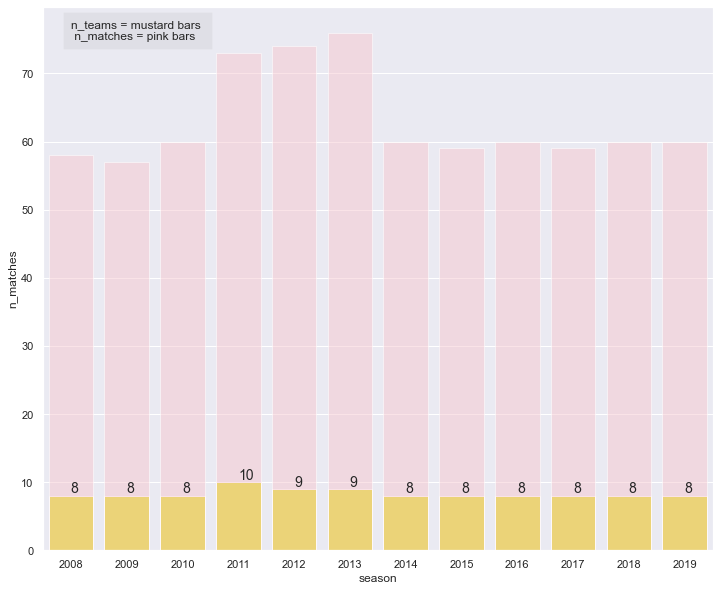

In [234]:
fig, ax1 = plt.subplots(figsize=(12,10))
#bar plot creation
ax1 = sb.barplot(x='season', y='n_teams', data = year,color = 'yellow')

color = 'tab:red'

ax1.text(0,75, 'n_teams = mustard bars \n n_matches = pink bars', fontsize=12,
        bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 8})

for index , value in enumerate(year.n_teams):
    plt.text(index, value+1, str(value), fontsize = 14, va ='center')

ax2 = sb.barplot(x='season', y='n_matches', data = year, color='pink', alpha = 0.5)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

In [235]:
team.head(13)

,Teams,tl_mw,tw_mw,n_play,n_won,n_lost,diff,toss,bat,field
0,Mumbai Indians,53,56,187,109,78,31,98,44,54
1,Kings XI Punjab,47,35,176,82,94,-12,81,26,55
2,Royal Challengers Bangalore,43,41,180,84,96,-12,81,20,61
3,Chennai Super Kings,43,57,164,100,64,36,89,48,41
4,Sunrisers Hyderabad,35,23,108,58,50,8,46,20,26
5,Rajasthan Royals,33,42,147,75,72,3,80,32,48
6,Delhi Daredevils,32,35,161,67,94,-27,80,29,51
7,Deccan Chargers,10,19,75,29,46,-17,43,24,19
8,Pune Warriors,9,3,46,12,34,-22,20,11,9
9,Delhi Capitals,3,7,16,10,6,4,10,2,8


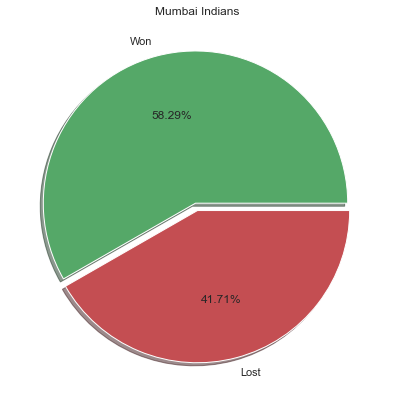

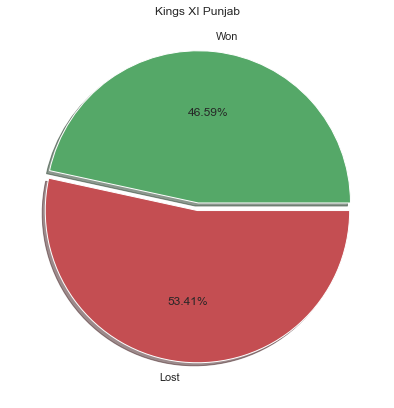

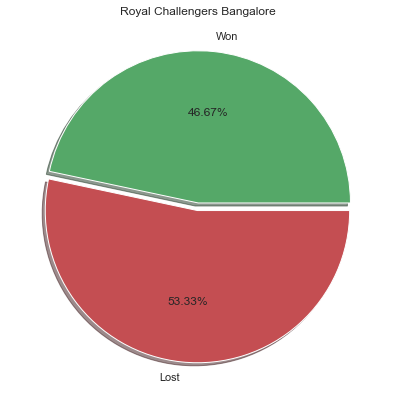

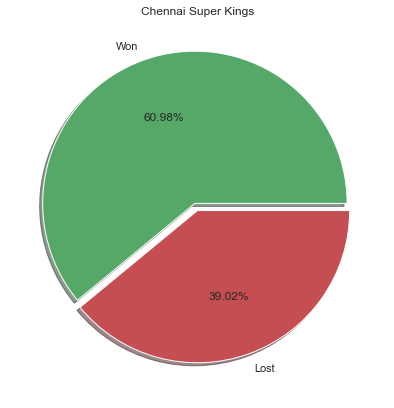

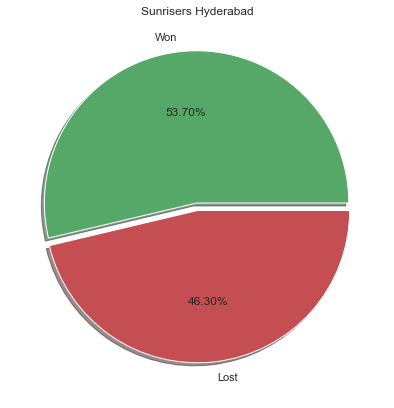

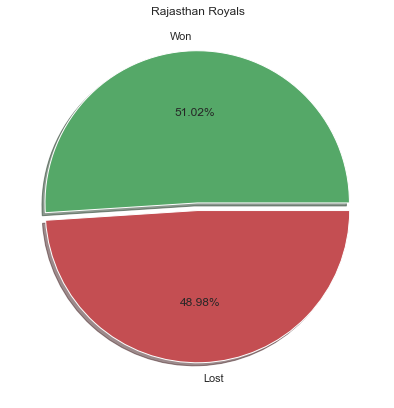

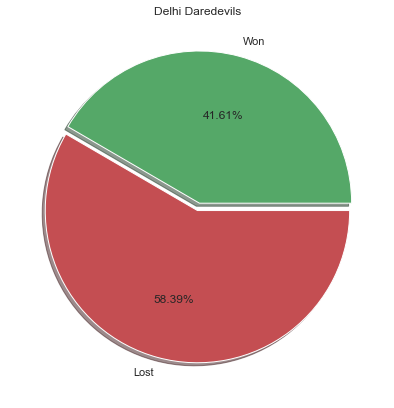

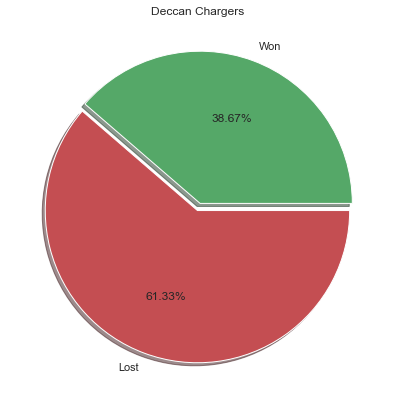

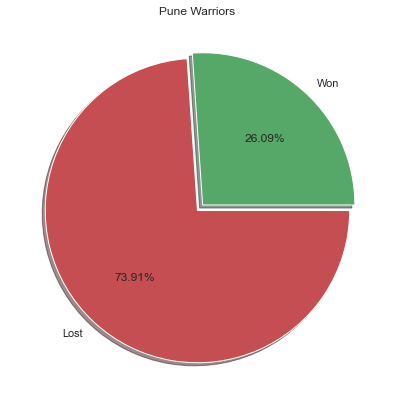

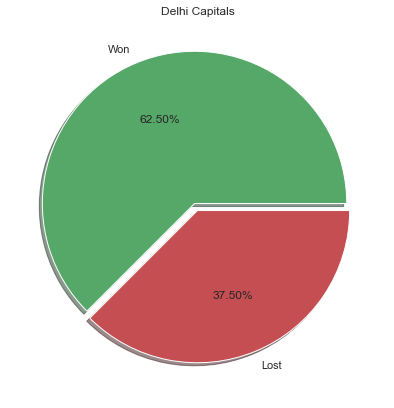

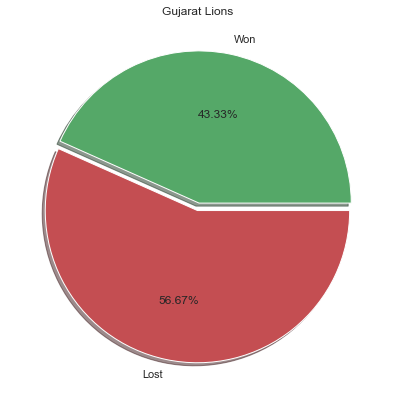

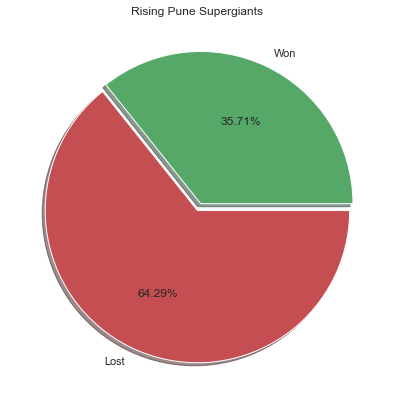

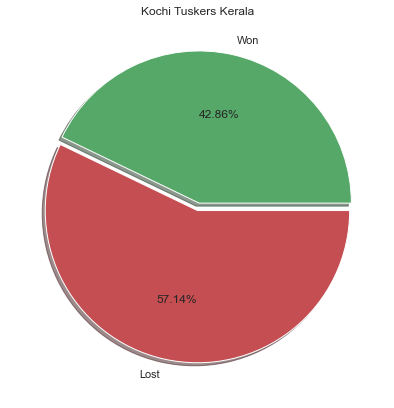

In [236]:

for i in range(0,13):
    section = [team.n_won[i],team.n_lost[i]]
    labels=['Won','Lost']
    plt.title(team.Teams[i])
    plt.pie(section,labels=labels,startangle=0,shadow=True,explode=(0.05,0),autopct='%1.2f%%',colors=['g','r'])
   
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    plt.show()

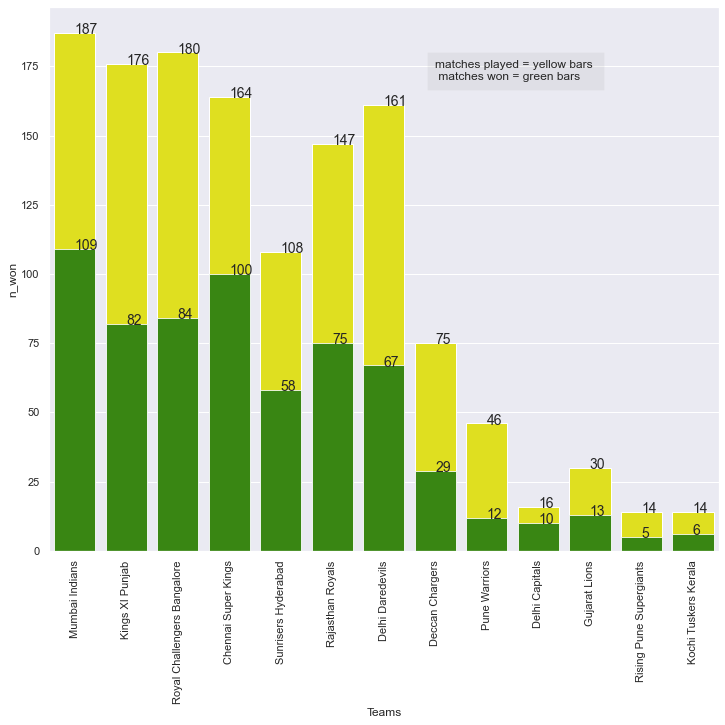

In [237]:
fig, ax1 = plt.subplots(figsize=(12,10))

#bar plot creation
ax1 = sb.barplot(x='Teams', y='n_play', data = team,color = 'yellow')
ax2 = sb.barplot(x='Teams', y='n_won', data = team, color='green', alpha = 0.8)
ax2.tick_params(axis='x', color='blue', rotation = 90)

ax1.text(7,170, 'matches played = yellow bars \n matches won = green bars', fontsize=12,
        bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 8})

for index , value in enumerate(team.n_won):
    plt.text(index, value+1, str(value), fontsize = 14, va ='center')
    
    
for index , value in enumerate(team.n_play):
    plt.text(index, value+1, str(value), fontsize = 14, va ='center')
    
    
#show plot
plt.show()

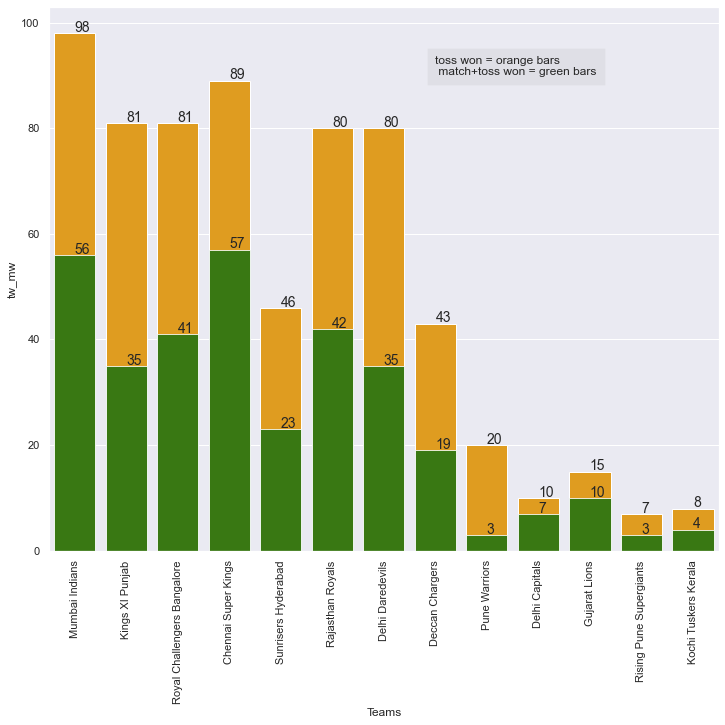

In [238]:
fig, ax1 = plt.subplots(figsize=(12,10))
#bar plot creation
ax1 = sb.barplot(x='Teams', y='toss', data = team,color = 'orange')
ax2 = sb.barplot(x='Teams', y='tw_mw', data = team, color='green', alpha = 0.8)
ax2.tick_params(axis='x', color='blue', rotation = 90)

ax1.text(7,90, 'toss won = orange bars \n match+toss won = green bars', fontsize=12,
        bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 8})

for index , value in enumerate(team.tw_mw):
    plt.text(index, value+1, str(value), fontsize = 14, va ='center')    
for index , value in enumerate(team.toss):
    plt.text(index, value+1, str(value), fontsize = 14, va ='center')

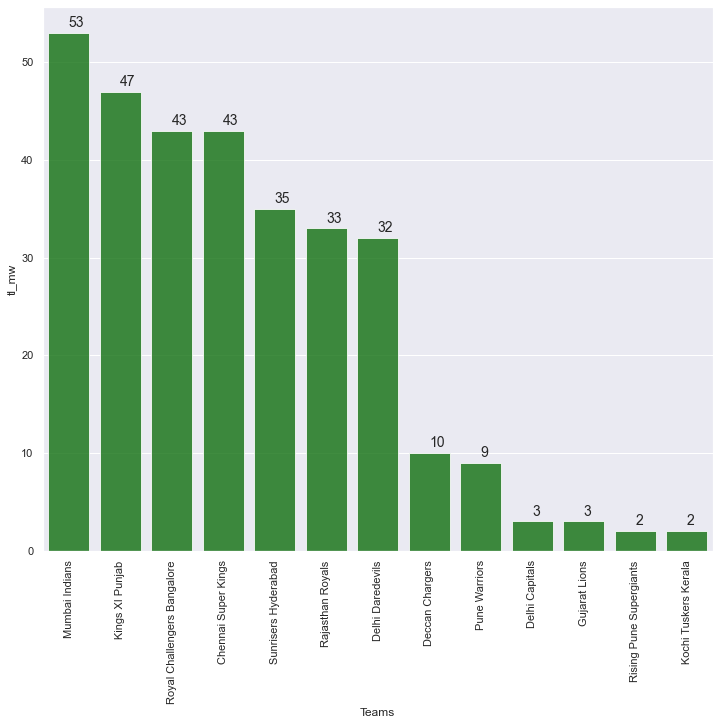

In [239]:
fig, ax1 = plt.subplots(figsize=(12,10))
#bar plot creation
ax1 = sb.barplot(x='Teams', y='tl_mw', data = team, color='green', alpha = 0.8)
ax1.tick_params(axis='x', color='blue', rotation = 90)  
for index , value in enumerate(team.tl_mw):
    plt.text(index, value+1, str(value), fontsize = 14, va ='center')
#show plot
plt.show()

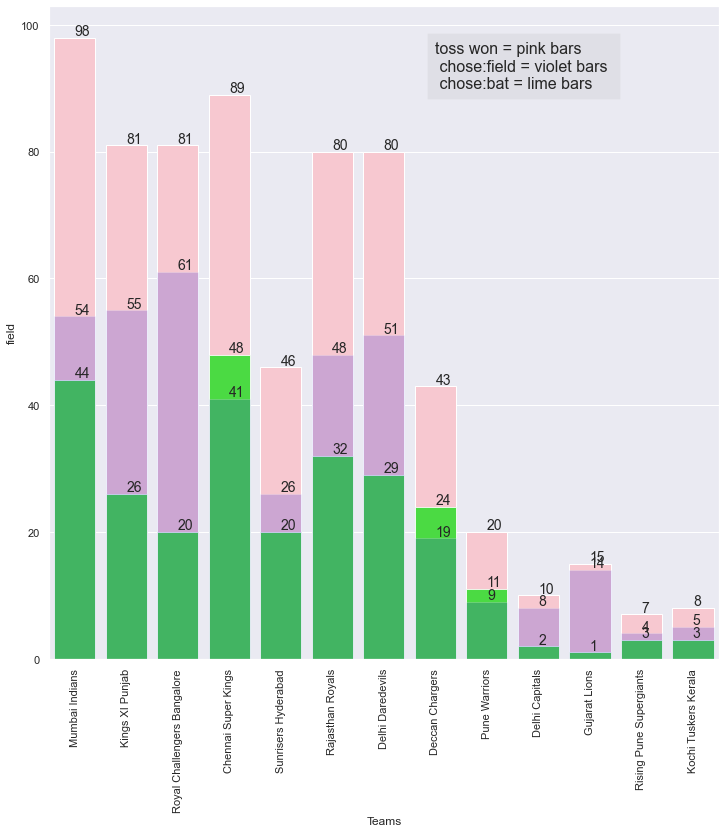

In [248]:
fig, ax1 = plt.subplots(figsize=(12,12))
#bar plot creation
ax1 = sb.barplot(x='Teams', y='toss', data = team,color = 'pink',)
ax2 = sb.barplot(x='Teams', y='bat', data = team, color='lime', alpha = 0.8)
ax3 = sb.barplot(x='Teams', y='field', data = team, color='blue', alpha = 0.2)
ax2.tick_params(axis='x', color='blue', rotation = 90)

ax1.text(7,90, 'toss won = pink bars \n chose:field = violet bars \n chose:bat = lime bars', fontsize=16,
        bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 8})

for index , value in enumerate(team.toss):
    plt.text(index, value+1, str(value), fontsize = 14, va ='center')    
for index , value in enumerate(team.bat):
    plt.text(index, value+1, str(value), fontsize = 14, va ='center')
for index , value in enumerate(team.field):
    plt.text(index, value+1, str(value), fontsize = 14, va ='center')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,bat_win
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,0
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,0
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,0
4,5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Sundaram Ravi,Virender Sharma,1


<AxesSubplot:xlabel='winner'>

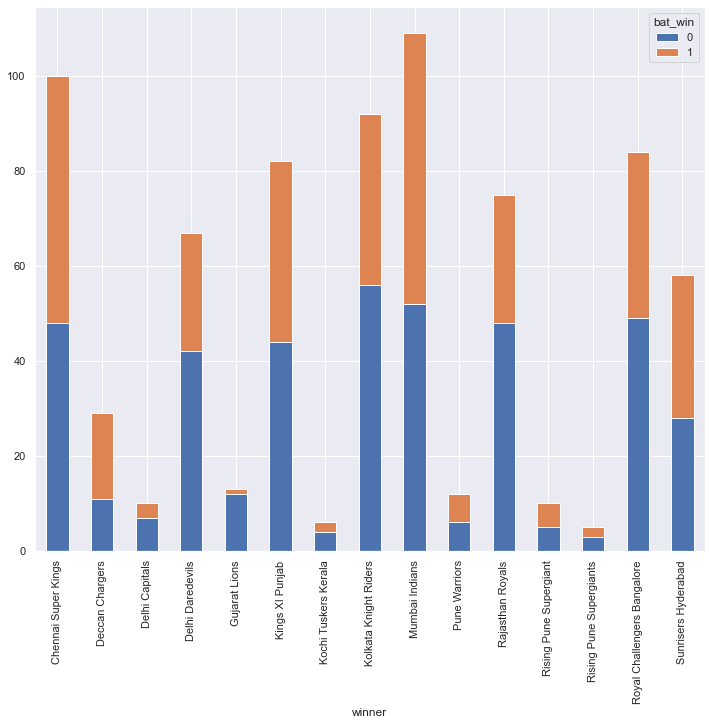

In [262]:
matches["bat_win"] = np.where((matches.win_by_runs > 0), '1', '0')
leg = ["won","lost"]
matches.groupby('winner')['bat_win'].value_counts().unstack().plot(kind = 'bar', stacked = True,figsize=(12,10))

[Text(0, 0, 'Mumbai Indians'),
 Text(1, 0, 'Kings XI Punjab'),
 Text(2, 0, 'Royal Challengers Bangalore'),
 Text(3, 0, 'Chennai Super Kings'),
 Text(4, 0, 'Sunrisers Hyderabad'),
 Text(5, 0, 'Rajasthan Royals'),
 Text(6, 0, 'Delhi Daredevils'),
 Text(7, 0, 'Deccan Chargers'),
 Text(8, 0, 'Pune Warriors'),
 Text(9, 0, 'Delhi Capitals'),
 Text(10, 0, 'Gujarat Lions'),
 Text(11, 0, 'Rising Pune Supergiants'),
 Text(12, 0, 'Kochi Tuskers Kerala')]

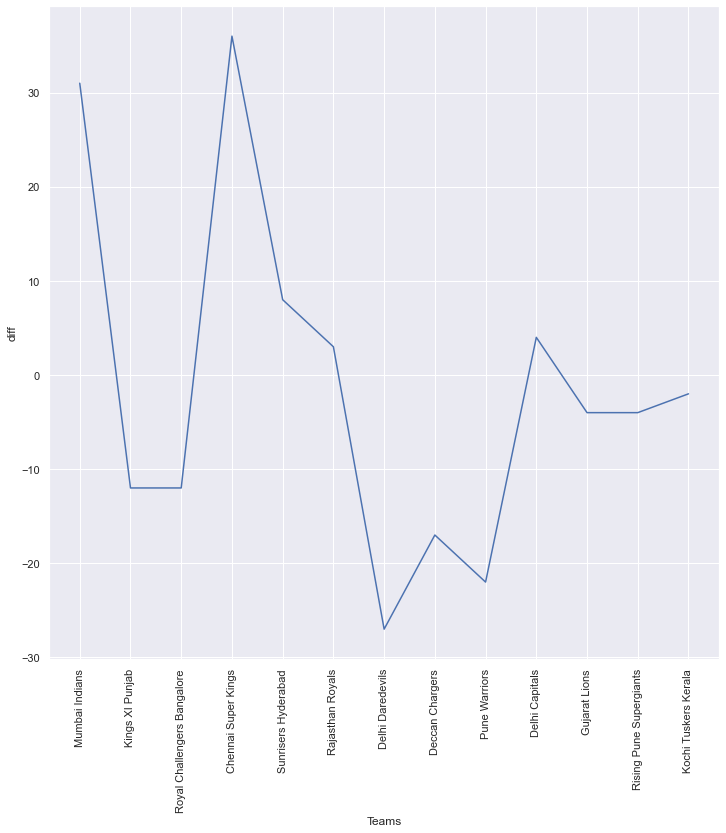

In [241]:
fig, ax1 = plt.subplots(figsize=(12,12))
g = sb.lineplot("Teams","diff",data = team)
g.set_xticklabels(labels = team.Teams, rotation=90)

**Which team has won maxiumum number of times ?**

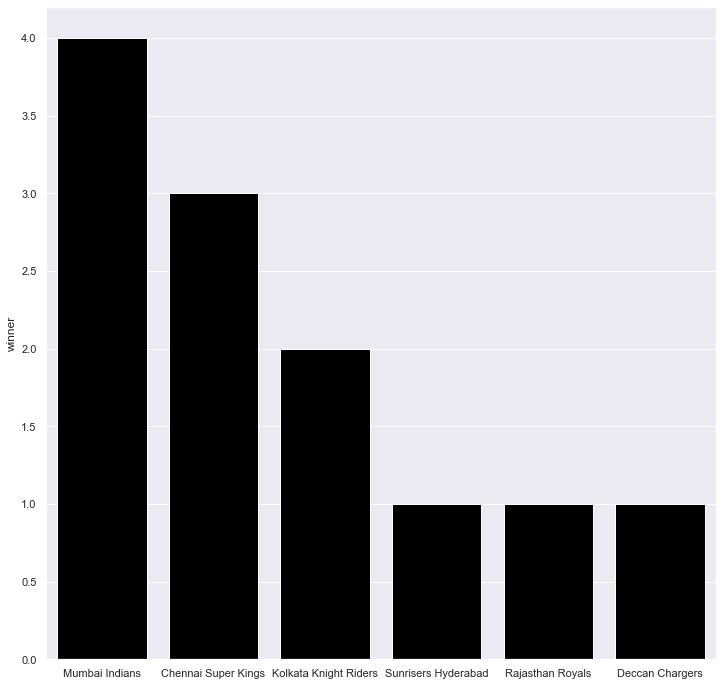

In [242]:
fig, ax1 = plt.subplots(figsize=(12,12))
#bar plot creation
yw = pd.DataFrame(year.winner.value_counts())
yw.head()
ax1 = sb.barplot(x=yw.index, y=yw.winner, data = yw,color = 'black')


# Let us now head to our second dataset for further analysis.
### Untill now we analysed how teams performed now we will go through each player's performance statistics.

In [158]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [160]:
delivery.shape

(179078, 21)

In [161]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [162]:
delivery.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000
